# Cluster Analysis in Python
#### Course Description
You have probably come across Google News, which automatically groups similar news articles under a topic. Have you ever wondered what process runs in the background to arrive at these groups? In this course, you will be introduced to unsupervised learning through clustering using the SciPy library in Python. This course covers pre-processing of data and application of hierarchical and k-means clustering. Through the course, you will explore player statistics from a popular football video game, FIFA 18. After completing the course, you will be able to quickly apply various clustering algorithms on data, visualize the clusters formed and analyze results.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import kmeans, vq, whiten


# 1. Introduction to Clustering

Before you are ready to classify news articles, you need to be introduced to the basics of clustering. This chapter familiarizes you with a class of machine learning algorithms called unsupervised learning and then introduces you to clustering, one of the popular unsupervised learning algorithms. You will know about two popular clustering techniques - hierarchical clustering and k-means clustering. The chapter concludes with basic pre-processing steps before you start clustering data.

### Pokémon sightings
There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x and y, respectively.

#### Instructions

- Import the pyplot class from matplotlib library as plt.
- Create a scatter plot using the pyplot class.
- Display the scatter plot created in the earlier step.

In [2]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

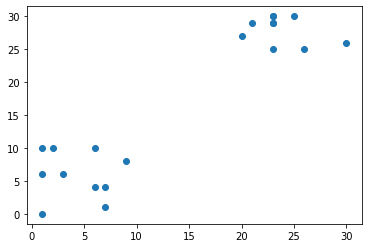

In [3]:
# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

### Pokémon sightings: hierarchical clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

#### Instructions

- Import the linkage and fcluster libraries.
- Use the linkage() function to compute distances using the ward method.
- Generate cluster labels for each data point with two clusters using the fcluster() function.
- Plot the points with seaborn and assign a different color to each cluster.

In [4]:
df = pd.DataFrame(data = {'x' : x , 'y' : y})
df.x = df.x.astype(float)
df.y = df.y.astype(float)

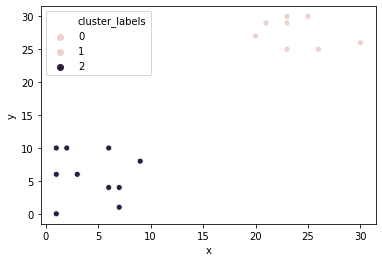

In [5]:
# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()
df = df.drop('cluster_labels', axis = 1)

### Pokémon sightings: k-means clustering
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

#### Instructions

- Import the kmeans and vq functions.
- Use the kmeans() function to compute cluster centers by defining two clusters.
- Assign cluster labels to each data point using vq() function.
- Plot the points with seaborn and assign a different color to each cluster

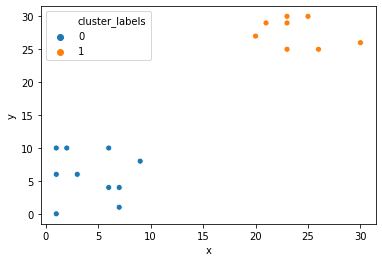

In [6]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

### Normalize basic list data
Now that you are aware of normalization, let us try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the whiten() function.

#### Instructions

- Import the whiten function.
- Use the whiten() function to standardize the data.
- Use the matplotlib library to plot the original and scaled data.
- Show the legend in the plot.
- Display the plot.

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


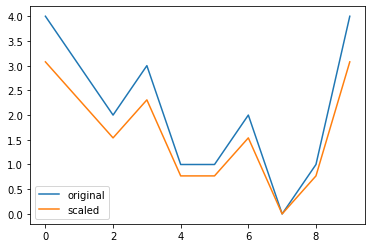

In [7]:
goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

### Normalization of small numbers
In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, matplotlib.pyplot is imported as plt.

#### Instructions

- Scale the list rate_cuts, which contains the changes in interest rates.
- Plot the original data against the scaled data.

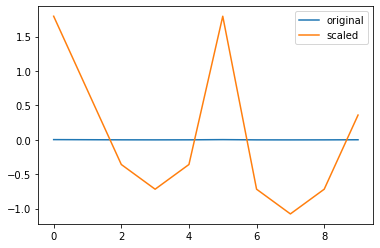

In [8]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

### FIFA 18: Normalize data
FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

The data for this exercise is stored in a Pandas dataframe, fifa. whiten from scipy.cluster.vq and matplotlib.pyplot as plt have been pre-loaded.

#### Instructions
- Scale the values of eur_wage and eur_value using the whiten() function.
- Plot the scaled wages and transfer values of players using the .plot() method of Pandas.


In [9]:
fifa = pd.read_csv('data/fifa_18_sample_data.csv')

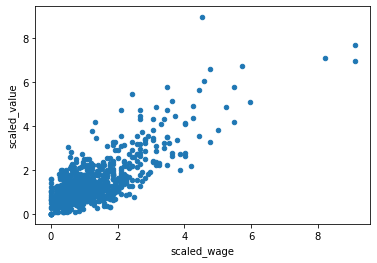

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [10]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

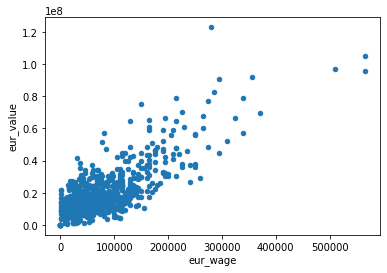

In [11]:
fifa.plot(x='eur_wage', y='eur_value', kind = 'scatter')
plt.show()

# 2. Hierarchical Clustering

This chapter focuses on a popular clustering algorithm - hierarchical clustering - and its implementation in SciPy. In addition to the procedure to perform hierarchical clustering, it attempts to help you answer an important question - how many clusters are present in your data? The chapter concludes with a discussion on the limitations of hierarchical clustering and discusses considerations while using hierarchical clustering.

### Hierarchical clustering: ward method
It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

#### Instructions

- Import fcluster and linkage from scipy.cluster.hierarchy.
- Use the ward method in the linkage() function.
- Assign cluster labels by forming 2 flat clusters from distance_matrix.
- Run the plotting code to see the results.

In [12]:
comic_con = pd.read_csv('data/comicon.csv', index_col=0)

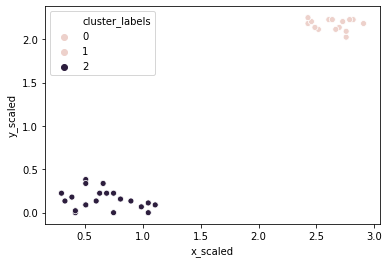

In [13]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']],
                          method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()


### Hierarchical clustering: single method


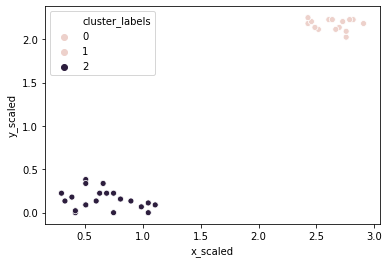

In [14]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], 
                          method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Hierarchical clustering: complete method

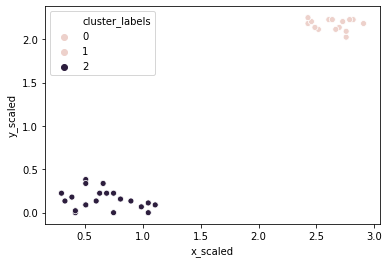

In [15]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], 
                          method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Visualize clusters with matplotlib

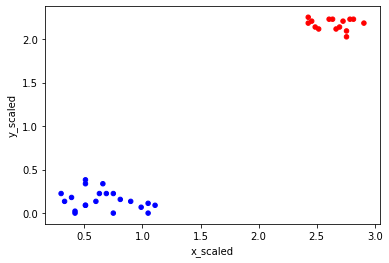

In [16]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

### Visualize clusters with seaborn

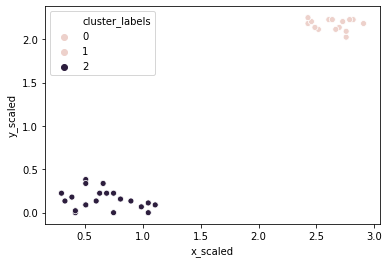

In [17]:
# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

### Create a dendrogram
Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

#### Instructions

- Import the dendrogram function from scipy.cluster.hierarchy.
- Create a dendrogram using the linkage object.
- Display the dendrogram using .show() method of the plt object.

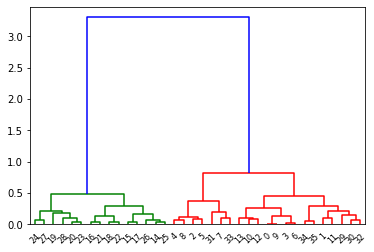

In [18]:
# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

### FIFA 18: exploring defenders
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
aggression: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.

The following modules are pre-loaded: dendrogram, linkage, fcluster from scipy.cluster.hierarchy, matplotlib.pyplot as plt, seaborn as sns. The data is stored in a Pandas dataframe, fifa.

#### Instructions 
- Fit the scaled data in columns scaled_sliding_tackle and scaled_aggression into a hierarchical clustering algorithm. Additionally, you may want to check how long it takes to run the data in the console using the timeit module.
- Assign cluster labels to each row in the data using the fcluster() function (use 3 clusters).
- Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.
- Create a scatter plot using seaborn with the scaled_sliding_tackle attribute on the x-axis and the scaled_aggression attribute on the y-axis. Assign a different color to each cluster.

In [19]:
fifa = pd.read_csv('data/fifa.csv', index_col=0)

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.918164           4.290068
2                            1.267917           3.906601
3                            0.858130           2.180922


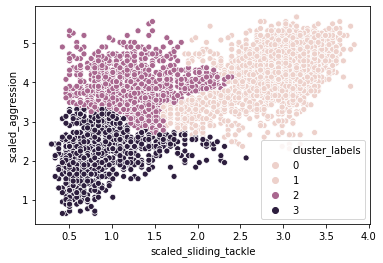

In [20]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

# 3. K-Means Clustering
This chapter introduces a different clustering algorithm - k-means clustering - and its implementation in SciPy. K-means clustering overcomes the biggest drawback of hierarchical clustering that was discussed in the last chapter. As dendrograms are specific to hierarchical clustering, this chapter discusses one method to find the number of clusters before running k-means clustering. The chapter concludes with a discussion on the limitations of k-means clustering and discusses considerations while using this algorithm.

### K-means clustering: first exercise
This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.
The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

#### Instructions

- Import kmeans and vq functions in SciPy.
- Generate cluster centers using the kmeans() function with two clusters.
- Create cluster labels using these cluster centers.

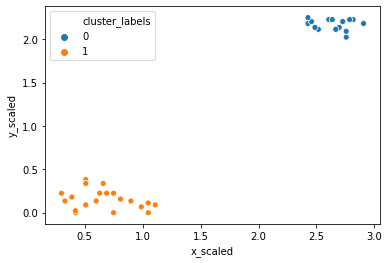

In [21]:
# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled','y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Elbow method on distinct clusters
Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

#### Instructions 
- Create a list of distortions for each cluster in num_clusters.
- Create a data frame elbow_plot with num_clusters and distortions.
- With the .lineplot() method, plot elbow_plot with num_clusters in the x axis and distortions in the y axis.


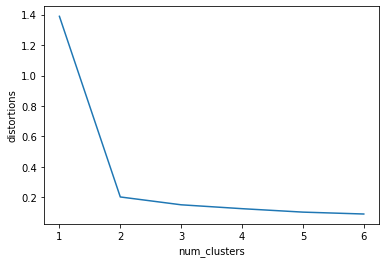

In [22]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Elbow method on uniform data
In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points on the console before proceeding with the exercise.

The data is stored in a Pandas data frame, uniform_data. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of points.

#### Instructions 

- Create a list of distortions for each cluster in num_clusters.
- Create a data frame elbow_plot with num_clusters and distortions.
- With the .lineplot() method, plot elbow_plot with num_clusters in the x axis and distortions in the y axis.


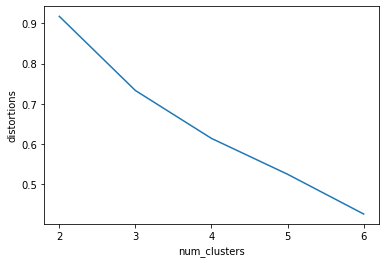

In [23]:
uniform_data = pd.read_csv('data/uniform_data.csv', index_col=0)
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Impact of seeds on distinct clusters
You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

#### Instructions
- Import the random class from numpy and initialize the seed with the integer 0.
- Change your code from the earlier step so that the seed is initialized with a list [1, 2, 1000].

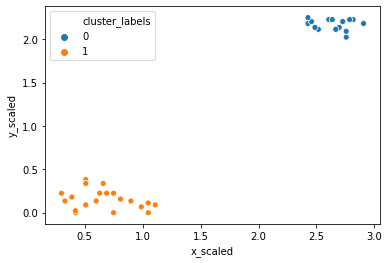

In [24]:
# Initialize seed
np.random.seed([0,1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Uniform clustering patterns
Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

Here is how a typical mouse-like dataset looks like [(Source)](https://www.researchgate.net/figure/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids_fig3_256378655).


<img src = "data/mouseclicks.PNG" width = 300>

The data is stored in a Pandas data frame, mouse. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of the data points.

#### Instructions

- Import kmeans and vq functions in SciPy.
- Generate cluster centers using the kmeans() function with three clusters.
- Create cluster labels with vq() with the cluster centers generated above.

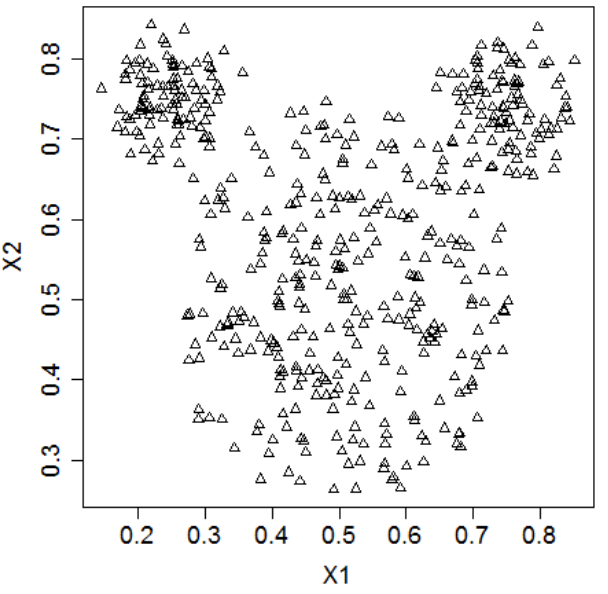

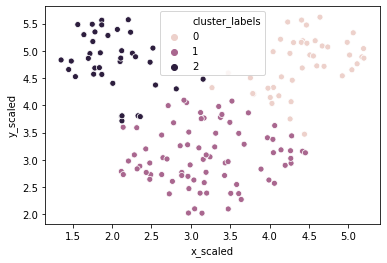

In [25]:
mouse = pd.read_csv('data/mouse_clicks.csv')
# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled','y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled','y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

### FIFA 18: defenders revisited
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

- defending: a number which signifies the defending attributes of a player
- physical: a number which signifies the physical attributes of a player

These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

The following modules have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns. The data for this exercise is stored in a Pandas dataframe, fifa. The scaled variables are scaled_def and scaled_phy.

#### Instructions 
- Initialize the random seed to the list [1000,2000].


In [26]:
fifa = pd.read_csv('data/fifa_18_sample_data.csv')
fifa['scaled_def'] = fifa['def']/fifa['def'].std()
fifa['scaled_phy'] = fifa['phy']/fifa['phy'].std()

                scaled_def  scaled_phy
cluster_labels                        
0                 1.947323    7.159652
1                 3.815935    9.015941
2                 2.071767    9.061793


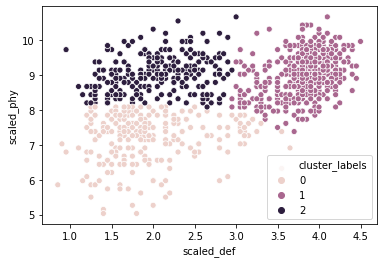

In [27]:
# Set up a random seed in numpy
np.random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)

# 4. Clustering in Real World

Now that you are familiar with two of the most popular clustering techniques, this chapter helps you apply this knowledge to real-world problems. The chapter first discusses the process of finding dominant colors in an image, before moving on to the problem discussed in the introduction - clustering of news articles. The chapter concludes with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.

In [28]:
batman_image = plt.imread('data/batman.jpg')
r, g, b = batman_image[:,:,0], batman_image[:,:,1], batman_image[:,:,2]
batman_df = pd.DataFrame(data = {'red' : r.flatten(), 'green' : g.flatten(), 'blue' : b.flatten()})
batman_df['scaled_red']   = batman_df.red / batman_df.red.std()
batman_df['scaled_blue']  = batman_df.blue / batman_df.blue.std()
batman_df['scaled_green'] = batman_df.green / batman_df.green.std()

In [29]:
batman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45461 entries, 0 to 45460
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   red           45461 non-null  uint8  
 1   green         45461 non-null  uint8  
 2   blue          45461 non-null  uint8  
 3   scaled_red    45461 non-null  float64
 4   scaled_blue   45461 non-null  float64
 5   scaled_green  45461 non-null  float64
dtypes: float64(3), uint8(3)
memory usage: 1.2 MB


### How many dominant colors?
We have loaded the following image using the imread() function of the image class of matplotlib.



The RGB values are stored in a data frame, batman_df. The RGB values have been standardized used the whiten() function, stored in columns, scaled_red, scaled_blue and scaled_green.

Construct an elbow plot with the data frame. How many dominant colors are present?

#### Instructions

- Create a list of distortions based on each value in num_clusters by running the kmeans() function.
- Create a data frame elbow_plot with the lists: num_clusters and distortions.
- Plot the data with seaborn's .lineplot() method with num_clusters on the x-axis and distortions on the y-axis.


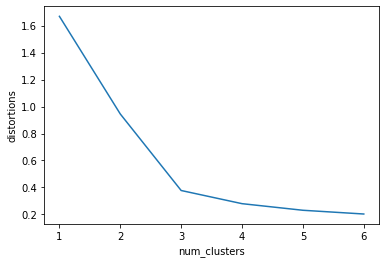

In [30]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame(data = {'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

cluster_centers, distortion = kmeans(batman_df[['scaled_red', 'scaled_blue', 'scaled_green']], 3)

### Display dominant colors
We have loaded the following image using the imread() function of the image class of matplotlib.



To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: converted_pixel = standardized_pixel * pixel_std / 255

The RGB values are stored in a data frame, batman_df. The scaled RGB values are stored in columns, scaled_red, scaled_blue and scaled_green. The cluster centers are stored in the variable cluster_centers, which were generated using the kmeans() function with three clusters.

#### Instructions

- Get standard deviations of each color from the data frame and store it in r_std, g_std, b_std.
- For each cluster center, convert the standardized RGB values to scaled values in the range of 0-1.
- Display the colors of the cluster centers.

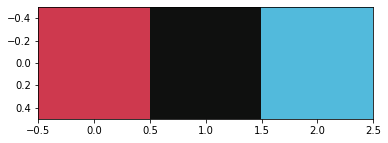

In [31]:
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()
colors = []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

In [32]:
from remove_noise_func import remove_noise
from nltk import word_tokenize

In [33]:
movies_df = pd.read_csv('data/movies_plot.csv')
plots = movies_df['Plot']
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features= 50, min_df= 0.1, tokenizer= remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

### Top terms in movie clusters
Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the .todense() method to convert the sparse matrix, tfidf_matrix to a normal matrix for the kmeans() function to process. Then, use the .get_feature_names() method to get a list of terms in the tfidf_vectorizer object. The zip() function in Python joins two lists.

The tfidf_vectorizer object and sparse matrix, tfidf_matrix, from the previous have been retained in this exercise. kmeans has been imported from SciPy.

With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some computational power, making it difficult to accomplish in an exercise here.

#### Instructions

- Generate cluster centers through the kmeans() function.
- Generate a list of terms from the tfidf_vectorizer object.
- Print top 3 terms of each cluster.

In [34]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['film', 'wife', 'life']
['back', 'two', 'one']


### Basic checks on clusters
In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.

The data is stored in a Pandas data frame, fifa. The scaled column names are present in a list scaled_features. The cluster labels are stored in the cluster_labels column. Recall the .count() and .mean() methods in Pandas help you find the number of observations and mean of observations in a data frame.

#### Instructions

- Print the size of the clusters by grouping the column cluster_labels.
- Print the mean values of the wages of the players in each cluster. eur_wage is the column name that stores the wages of a player in Euros.

In [35]:
fifa = pd.read_csv('data/fifa_again.csv', index_col=0)

In [36]:
scaled_features = ['scaled_pac', 'scaled_dri', 'scaled_sho']

In [37]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0     83
1    107
2     60
Name: ID, dtype: int64
cluster_labels
0    132108.433735
1    130308.411215
2    117583.333333
Name: eur_wage, dtype: float64


### FIFA 18: what makes a complete player?
The overall level of a player in FIFA 18 is defined by six characteristics: pace (pac), shooting (sho), passing (pas), dribbling (dri), defending (def), physical (phy).

In this exercise, you will use all six characteristics to create clusters. The data for this exercise is stored in a Pandas dataframe, fifa. features is the list of these column names and scaled_features is the list of columns which contains their scaled values. The following have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns.

Before you start the exercise, you may wish to explore scaled_features in the console to check out the list of six scaled columns names.

#### Instructions 
- Use the kmeans() algorithm to create 2 clusters using the list of columns, scaled_features.
- Assign cluster labels to each row using vq() and print cluster centers of scaled_features using the .mean() method of Pandas.
- Plot a bar chart of scaled attributes of each cluster center using the .plot() method of Pandas.
- Print the names of first 5 players in each cluster, using the name column.

In [38]:
import re
def pat_find(string):
    return re.findall(r'_\w+',string)[0][1:]

In [39]:
fifa = pd.read_csv('data/fifa_18_sample_data.csv')
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 'scaled_def', 'scaled_phy']

for feature in scaled_features:
    col = pat_find(feature)
    fifa[feature] = fifa[col]/fifa[col].std()

                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 6.685103    5.433988    8.452548    8.515229    2.487144   
1                 5.466037    3.688818    7.194355    6.789282    3.964164   

                scaled_phy  
cluster_labels              
0                 8.322103  
1                 9.206240  


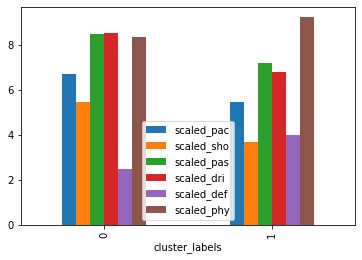

0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
1 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


In [40]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])